# Assignment 5
KNN algorithm on diabetes dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

Check for null values. If present remove null values from the dataset

In [5]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [6]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
y1 = df['Outcome']
y1

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Outcome is the label/target, other columns are features

In [8]:
x = df[df['Outcome']==1]['BMI']
y= df[df['Outcome']==0]['BMI']

(array([[  2.,   0.,   0.,  16.,  99.,  97.,  41.,  10.,   2.,   1.],
        [  9.,   0.,  15., 140., 169., 127.,  37.,   2.,   1.,   0.]]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 2 BarContainer objects>)

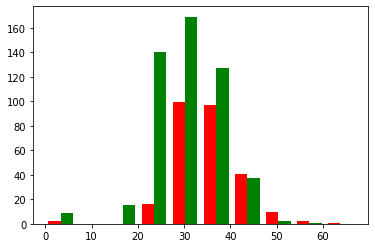

In [9]:
plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])

In [10]:
x = df[df['Outcome']==1]['Glucose']
y= df[df['Outcome']==0]['Glucose']

(array([[  2.,   0.,   0.,   1.,  13.,  54.,  63.,  51.,  45.,  39.],
        [  3.,   0.,   4.,  31., 143., 157., 100.,  44.,  11.,   7.]]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 2 BarContainer objects>)

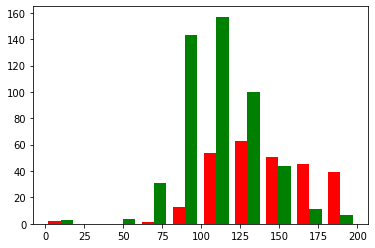

In [11]:
plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])

In [16]:
X=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'Pedigree', 'Age']]

In [17]:
from sklearn.preprocessing import scale
X = scale(X)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.3, random_state = 42)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [19]:
print("Confusion matrix: ")
cs = metrics.confusion_matrix(y_test,y_pred)
print(cs)

Confusion matrix: 
[[123  28]
 [ 37  43]]


In [20]:
print("Acccuracy ",metrics.accuracy_score(y_test,y_pred)*100)

Acccuracy  71.86147186147186


Classification error rate: proportion of instances misclassified over the whole set of instances.
Error rate is calculated as the total number of two incorrect predictions (FN + FP) divided by the total number of a dataset (examples in the dataset.

Also error_rate = 1- accuracy

In [21]:
total_misclassified = cs[0,1] + cs[1,0]
print(total_misclassified)
total_examples = cs[0,0]+cs[0,1]+cs[1,0]+cs[1,1]
print(total_examples)
print("Error rate",total_misclassified/total_examples)
print("Error rate ",1-metrics.accuracy_score(y_test,y_pred))

65
231
Error rate 0.2813852813852814
Error rate  0.2813852813852814


In [22]:
print("Precision score",metrics.precision_score(y_test,y_pred))

Precision score 0.6056338028169014


In [23]:
print("Recall score ",metrics.recall_score(y_test,y_pred))

Recall score  0.5375


In [24]:
print("Classification report ",metrics.classification_report(y_test,y_pred))

Classification report                precision    recall  f1-score   support

           0       0.77      0.81      0.79       151
           1       0.61      0.54      0.57        80

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.71      0.72      0.71       231

